## Setup 

In [3]:
import zipfile
from functools import reduce

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
#plot cpc, rolling mean, rolling standard deviation
#print Dickey–Fuller test
def plot_cpc(df, title, window = 5, adf = False):
    r_mean = df.rolling(window = window).mean()
    r_std = df.rolling(window = window).std()

    plt.plot(df, label = 'Original')
    plt.plot(r_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(r_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.xlabel('Year')
    plt.ylabel('Number of Patents')
    plt.title(title)
    plt.show()
    
    if adf:
        result = adfuller(df['Num_of_Patents'])
        print('ADF Statistic: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))
        #print('Critical Values:')
        #for key, value in result[4].items():
            #print('\t{}: {}'.format(key, value))
            
            
#plot first and second order differencing
def plot_diff(data, title):
    #plot data, rolling mean, rolling standard dev
    plot_cpc(data, title, adf = True)

    #subtracting rolling mean
    r_mean = data.rolling(window=5).mean()
    r_diff = data - r_mean
    r_diff.dropna(inplace=True)
    plot_cpc(r_diff, '{} Subtracting Rolling Mean (Window=5)'.format(title), adf = True)

    #time shifting - first order differencing
    #same as using .diff(periods=1)
    df_shift = data - data.diff()
    df_shift.dropna(inplace=True)
    plot_cpc(df_shift, '{} First Order Differencing (Period = 1)'.format(title), adf = True)

    #second order differencing
    df_shift2 = data.diff().diff()
    df_shift2.dropna(inplace=True)
    plot_cpc(df_shift2, '{} Second Order Differencing (Period = 1)'.format(title), adf = True)


## Data Processing

In [5]:
input_cpc = 'C02F 1/00; C02F 3/00; B01J 20/226; B01J 20/00; B01J 20/22; B01J 20/223;  B01J 20/28033; B01J 20/265; C02F 1/281; C02F 1/285; C02F 2101/20; G01N 33/497;  Y02C 10/08;  B01D 69/148'

In [6]:
# from zipfile import ZipFile

# original_zip = ZipFile ('data2000.zip', 'r')
# new_zip = ZipFile ('data.zip', 'w')
# for item in original_zip.infolist():
#     buffer = original_zip.read(item.filename)
#     if not str(item.filename).startswith('__MACOSX/'):
#         new_zip.writestr(item, buffer)
# new_zip.close()
# original_zip.close()

In [7]:
#data_zip = 'data2000.zip'
#zf = zipfile.ZipFile(data_zip) 
#zf.namelist()

In [8]:
file1 = 'patent.counts.by.CPC.by.grantyear.tsv'
file2 = 'patent.application.counts.by.CPC.by.grantyear.tsv'
file3 = 'patent.counts.owned.by.Private.Sector.by.CPC.by.grantyear.tsv'
file4 = 'patent.counts.owned.by.US.Federal.Government.by.CPC.by.grantyear.tsv'
file5 = 'patent.counts.owned.by.Universities.by.CPC.by.grantyear.tsv'
file6 = 'patent.counts.owned.by.Lone.Inventors.by.CPC.by.grantyear.tsv'
file7 = 'patent.counts.owned.by.Unique.Number.of.Assignees.by.CPC.by.grantyear.tsv'
file8 = 'patent.counts.supported.by.US.Federal.Government.by.CPC.by.grantyear.tsv'
file9 = 'cites.into.CPC.by.grantyear.tsv'
file10 = 'cites.from.CPC.by.grantyear.tsv'
file11 = 'cites.non-patent.literature.from.CPC.by.grantyear.tsv'

pat_counts = pd.read_csv(file1, sep="\t").set_index(['CPC','year_'])
app_counts = pd.read_csv(file2, sep="\t").set_index(['CPC','year_'])
priv_counts = pd.read_csv(file3, sep="\t").set_index(['CPC','year_'])
gov_counts = pd.read_csv(file4, sep="\t").set_index(['CPC','year_'])
univ_counts = pd.read_csv(file5, sep="\t").set_index(['CPC','year_'])
invent_counts = pd.read_csv(file6, sep="\t").set_index(['CPC','year_'])
assign_counts = pd.read_csv(file7, sep="\t").set_index(['CPC','year_'])
govsup_counts = pd.read_csv(file8, sep="\t").set_index(['CPC','year_'])
citesinto_counts = pd.read_csv(file9, sep="\t").set_index(['CPC','year_'])
citesfrom_counts = pd.read_csv(file10, sep="\t").set_index(['CPC','year_'])
citeslit_counts = pd.read_csv(file11, sep="\t").set_index(['CPC','year_'])

data_list = [pat_counts, app_counts, priv_counts, gov_counts, univ_counts, invent_counts, assign_counts, govsup_counts,
             citesinto_counts, citesfrom_counts, citeslit_counts]


In [9]:
data_all = reduce(lambda x, y: pd.merge(x, y, how='outer', left_index=True, right_index=True), data_list)
data_all.columns = ['patents', 'applications', 'private', 'government', 'university', 'inventor', 
                    'assignee', 'gov_support', 'cites_into', 'cites_from', 'cites_literature']

data_all = data_all.reset_index()


In [10]:
data_all = data_all.fillna(0)
data_all.head()

,CPC,year_,patents,applications,private,government,university,inventor,assignee,gov_support,cites_into,cites_from,cites_literature
0,A01B 1,2000,10.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,43.0,206.0,5.0
1,A01B 1,2001,5.0,1.0,2.0,0.0,0.0,3.0,2.0,5.0,31.0,62.0,0.0
2,A01B 1,2002,10.0,9.0,4.0,0.0,0.0,6.0,4.0,10.0,27.0,157.0,0.0
3,A01B 1,2003,4.0,9.0,3.0,0.0,0.0,1.0,3.0,4.0,44.0,78.0,0.0
4,A01B 1,2004,1.0,7.0,0.0,0.0,0.0,1.0,0.0,1.0,38.0,4.0,0.0


In [32]:
len(data_all['CPC'].unique())
data_all['CPC']

0               A01B 1
1               A01B 1
2               A01B 1
3               A01B 1
4               A01B 1
              ...     
4201075    Y10T83/7697
4201076    Y10T83/7755
4201077    Y10T83/9319
4201078    Y10T83/9319
4201079      Y10T83/97
Name: CPC, Length: 4201080, dtype: object

## Exploratory Data Analysis

ValueError: Could not interpret input 'granted'

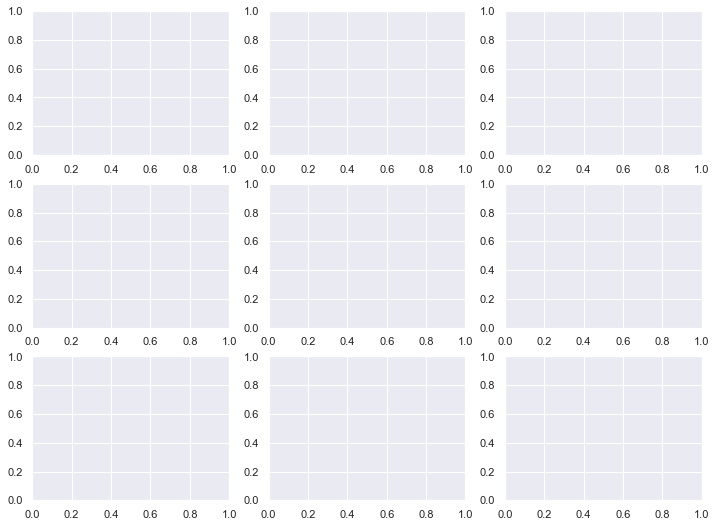

In [30]:
f, axes = plt.subplots(3, 3, figsize=(12,9))

sns.scatterplot(data=data_all, x="granted", y="applications", ax=axes[0][0])
axes[0][0].title.set_text('Granted vs Applications')
sns.scatterplot(data=data_all, x="granted", y="cites_into", ax=axes[0][1])
axes[0][1].title.set_text('Granted vs Citations Into')
sns.scatterplot(data=data_all, x="granted", y="cites_from", ax=axes[0][2])
axes[0][2].title.set_text('Granted vs Citations From')
sns.scatterplot(data=data_all, x="granted", y="cites_literature", ax=axes[1][0])
axes[1][0].title.set_text('Granted vs Citations Literature')
sns.scatterplot(data=data_all, x="granted", y="private", ax=axes[1][1])
axes[1][1].title.set_text('Granted vs Private')
sns.scatterplot(data=data_all, x="granted", y="government", ax=axes[1][2])
axes[1][2].title.set_text('Granted vs Government')
sns.scatterplot(data=data_all, x="granted", y="university", ax=axes[2][0])
axes[2][0].title.set_text('Granted vs University')
sns.scatterplot(data=data_all, x="granted", y="assignee", ax=axes[2][1])
axes[2][1].title.set_text('Granted vs Assignee')
sns.scatterplot(data=data_all, x="granted", y="gov_support", ax=axes[2][2])
axes[2][2].title.set_text('Granted vs Government Support')
plt.tight_layout();

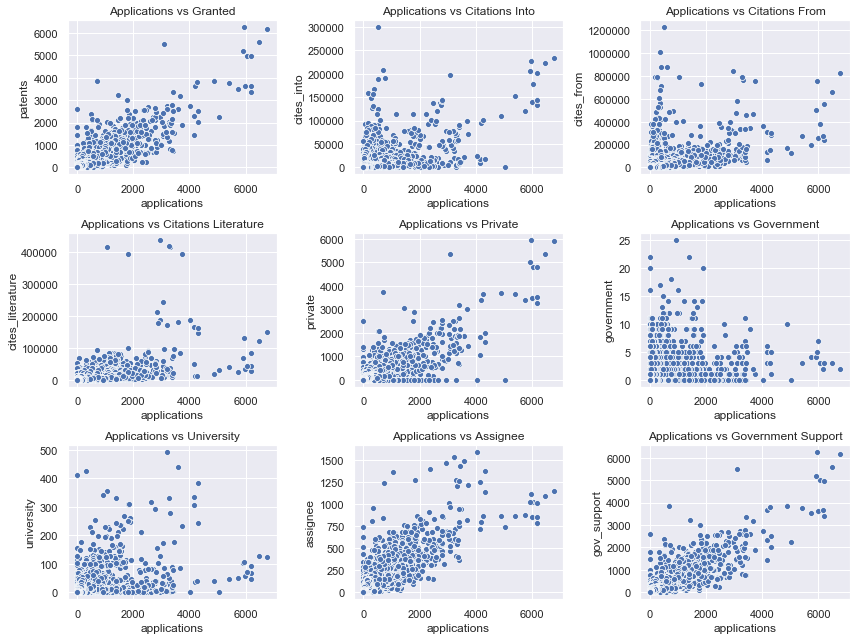

In [15]:
f, axes = plt.subplots(3, 3, figsize=(12,9))

sns.scatterplot(data=data_all, x="applications", y="patents", ax=axes[0][0])
axes[0][0].title.set_text('Applications vs Granted')
sns.scatterplot(data=data_all, x="applications", y="cites_into", ax=axes[0][1])
axes[0][1].title.set_text('Applications vs Citations Into')
sns.scatterplot(data=data_all, x="applications", y="cites_from", ax=axes[0][2])
axes[0][2].title.set_text('Applications vs Citations From')
sns.scatterplot(data=data_all, x="applications", y="cites_literature", ax=axes[1][0])
axes[1][0].title.set_text('Applications vs Citations Literature')
sns.scatterplot(data=data_all, x="applications", y="private", ax=axes[1][1])
axes[1][1].title.set_text('Applications vs Private')
sns.scatterplot(data=data_all, x="applications", y="government", ax=axes[1][2])
axes[1][2].title.set_text('Applications vs Government')
sns.scatterplot(data=data_all, x="applications", y="university", ax=axes[2][0])
axes[2][0].title.set_text('Applications vs University')
sns.scatterplot(data=data_all, x="applications", y="assignee", ax=axes[2][1])
axes[2][1].title.set_text('Applications vs Assignee')
sns.scatterplot(data=data_all, x="applications", y="gov_support", ax=axes[2][2])
axes[2][2].title.set_text('Applications vs Government Support')
plt.tight_layout();

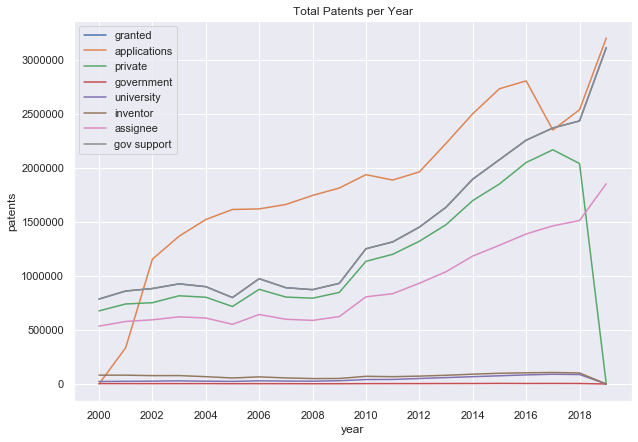

In [16]:
sumByYear = data_all.groupby('year_').sum()

plt.figure(figsize=(10,7))
sns.lineplot(sumByYear.index, sumByYear['patents'], label='granted') 
sns.lineplot(sumByYear.index, sumByYear['applications'], label='applications') 
sns.lineplot(sumByYear.index, sumByYear['private'], label='private') 
sns.lineplot(sumByYear.index, sumByYear['government'], label='government') 
sns.lineplot(sumByYear.index, sumByYear['university'], label='university') 
sns.lineplot(sumByYear.index, sumByYear['inventor'], label='inventor') 
sns.lineplot(sumByYear.index, sumByYear['assignee'], label='assignee') 
sns.lineplot(sumByYear.index, sumByYear['gov_support'], label='gov support') 

plt.legend()
plt.title('Total Patents per Year')
plt.xlabel('year')
plt.ylabel('patents')
plt.xticks(range(2000,2019,2));

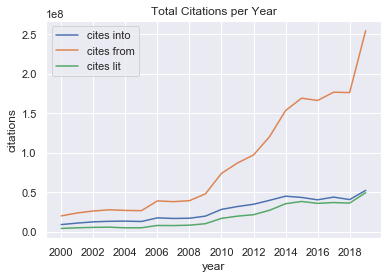

In [17]:
sns.lineplot(sumByYear.index, sumByYear['cites_into'], label='cites into') 
sns.lineplot(sumByYear.index, sumByYear['cites_from'], label='cites from') 
sns.lineplot(sumByYear.index, sumByYear['cites_literature'], label='cites lit') 

plt.legend()
plt.title('Total Citations per Year')
plt.xlabel('year')
plt.ylabel('citations')
plt.xticks(range(2000,2019,2));

In [39]:
data_all['CPC_cat'] = data_all['CPC'].str[0:4].[-'A61F']
sumByCat = data_all.groupby(['CPC_cat']).sum()

SyntaxError: invalid syntax (<ipython-input-39-4e720ac7e46e>, line 1)

In [37]:
input_cpc

'C02F 1/00; C02F 3/00; B01J 20/226; B01J 20/00; B01J 20/22; B01J 20/223;  B01J 20/28033; B01J 20/265; C02F 1/281; C02F 1/285; C02F 2101/20; G01N 33/497;  Y02C 10/08;  B01D 69/148'

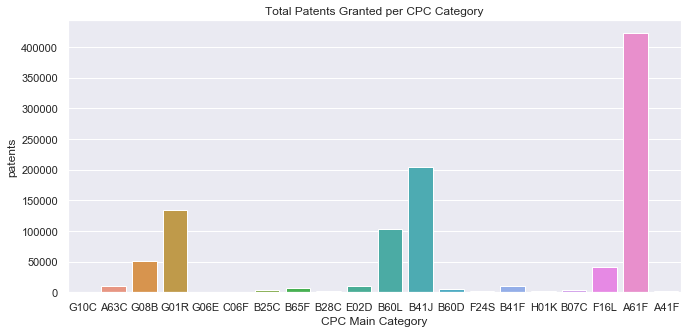

In [38]:
sumSample = sumByCat.sample(n = 20, replace = False, random_state=10) 

plt.figure(figsize=(11,5))
sns.barplot(x=sumSample.index, y="patents", data=sumSample)
plt.title('Total Patents Granted per CPC Category')
plt.xlabel('CPC Main Category');

## Laser CPCs

In [1]:
inputCPC = 'C02F 1/00; C02F 3/00; B01J 20/226; B01J 20/00; B01J 20/22; B01J 20/223;  B01J 20/28033; B01J 20/265; C02F 1/281; C02F 1/285; C02F 2101/20; G01N 33/497;  Y02C 10/08;  B01D 69/148'
laserCPC = inputCPC.split('; ')

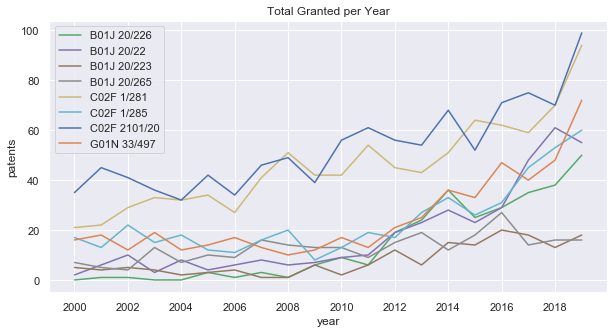

In [14]:
laserData = data_all[data_all['CPC'].isin(laserCPC)]

plt.figure(figsize=(10,5))
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[0]]['patents'], label=laserCPC[0]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[1]]['patents'], label=laserCPC[1]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[2]]['patents'], label=laserCPC[2]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[3]]['patents'], label=laserCPC[3]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[4]]['patents'], label=laserCPC[4]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[5]]['patents'], label=laserCPC[5]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[6]]['patents'], label=laserCPC[6]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[7]]['patents'], label=laserCPC[7]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[8]]['patents'], label=laserCPC[8]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[9]]['patents'], label=laserCPC[9]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[10]]['patents'], label=laserCPC[10]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[11]]['patents'], label=laserCPC[11]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[12]]['patents'], label=laserCPC[12]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[13]]['patents'], label=laserCPC[13]) 
#sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[14]]['patents'], label=laserCPC[14]) 
#sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[15]]['patents'], label=laserCPC[15]) 
#sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[16]]['patents'], label=laserCPC[16]) 
#sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[17]]['patents'], label=laserCPC[17]) 

plt.legend()
plt.title('Total Granted per Year')
plt.xlabel('year')
plt.ylabel('patents')
plt.xticks(range(2000,2019,2));

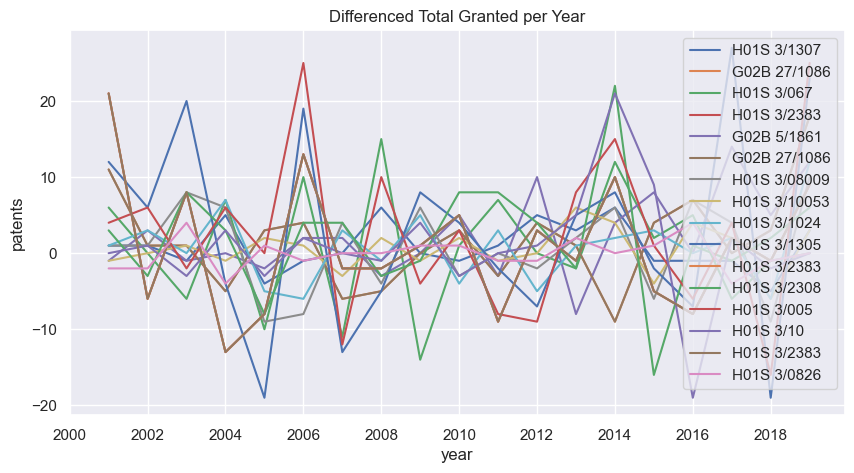

In [357]:
laserData = data_all[data_all['CPC'].isin(laserCPC)]

plt.figure(figsize=(10,5))
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[0]]['patents'].diff(), label=laserCPC[0]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[1]]['patents'].diff(), label=laserCPC[1]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[2]]['patents'].diff(), label=laserCPC[2]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[3]]['patents'].diff(), label=laserCPC[3]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[4]]['patents'].diff(), label=laserCPC[4]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[5]]['patents'].diff(), label=laserCPC[5]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[6]]['patents'].diff(), label=laserCPC[6]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[7]]['patents'].diff(), label=laserCPC[7]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[8]]['patents'].diff(), label=laserCPC[8]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[9]]['patents'].diff(), label=laserCPC[9]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[10]]['patents'].diff(), label=laserCPC[10]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[11]]['patents'].diff(), label=laserCPC[11]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[12]]['patents'].diff(), label=laserCPC[12]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[13]]['patents'].diff(), label=laserCPC[13]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[14]]['patents'].diff(), label=laserCPC[14]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[15]]['patents'].diff(), label=laserCPC[15]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[16]]['patents'].diff(), label=laserCPC[16]) 

plt.title('Differenced Total Granted per Year')
plt.xlabel('year')
plt.ylabel('patents')
plt.xticks(range(2000,2019,2));

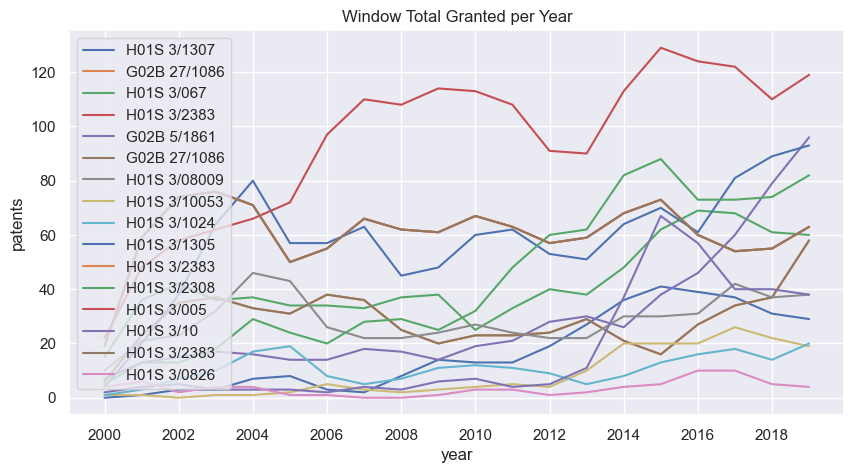

In [361]:
laserData = data_all[data_all['CPC'].isin(laserCPC)]

plt.figure(figsize=(10,5))
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[0]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[0]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[1]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[1]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[2]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[2]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[3]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[3]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[4]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[4]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[5]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[5]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[6]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[6]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[7]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[7]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[8]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[8]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[9]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[9]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[10]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[10]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[11]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[11]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[12]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[12]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[13]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[13]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[14]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[14]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[15]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[15]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[16]]['patents'].rolling(2, min_periods=1).sum(), label=laserCPC[16]) 

plt.title('Window Total Granted per Year')
plt.xlabel('year')
plt.ylabel('patents')
plt.xticks(range(2000,2019,2));


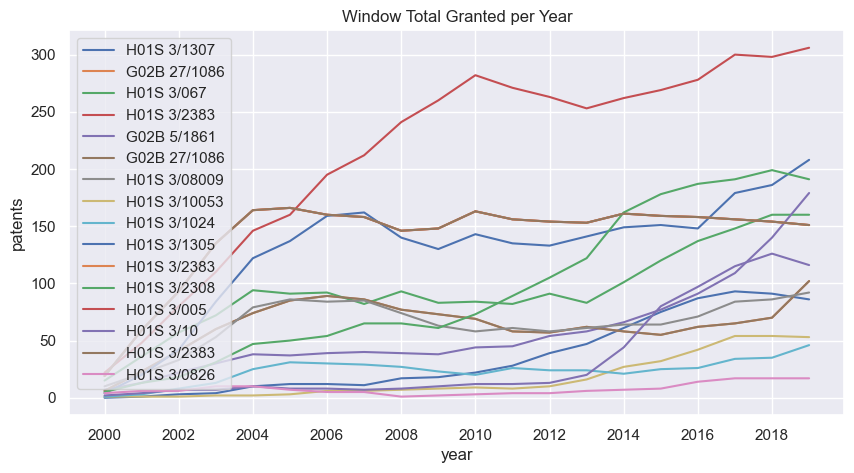

In [365]:
laserData = data_all[data_all['CPC'].isin(laserCPC)]

plt.figure(figsize=(10,5))
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[0]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[0]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[1]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[1]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[2]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[2]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[3]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[3]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[4]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[4]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[5]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[5]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[6]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[6]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[7]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[7]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[8]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[8]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[9]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[9]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[10]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[10]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[11]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[11]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[12]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[12]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[13]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[13]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[14]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[14]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[15]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[15]) 
sns.lineplot(laserData['year_'], laserData[laserData['CPC']==laserCPC[16]]['patents'].rolling(5, min_periods=1).sum(), label=laserCPC[16]) 

plt.title('Window Total Granted per Year')
plt.xlabel('year')
plt.ylabel('patents')
plt.xticks(range(2000,2019,2));


## Export Data to CSV

In [ ]:
data_all.to_csv('DataAll.csv',index = False)

In [376]:
granted_year = data_all.pivot(index='CPC', columns='year_', values='patents').fillna(0)
granted_year

year_,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
CPC,,,,,,,,,,,,,,,,,,,,
A01B 1,10.0,5.0,10.0,4.0,1.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,1.0,2.0,0.0,3.0,2.0,4.0,6.0
A01B 1/02,3.0,1.0,4.0,5.0,3.0,2.0,4.0,0.0,2.0,5.0,3.0,3.0,3.0,3.0,5.0,7.0,7.0,12.0,8.0,8.0
A01B 1/022,1.0,1.0,3.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,1.0,4.0,1.0,3.0,7.0,3.0,3.0
A01B 1/024,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0
A01B 1/026,1.0,1.0,3.0,1.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,4.0,5.0,3.0,5.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y10T83/7693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Y10T83/7697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Y10T83/7755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
